## Test gridded spatial interpolators using Franke bivariate test function  
http://www.sfu.ca/~ssurjano/franke2d.html  

In [1]:
import numpy as np
import scipy.interpolate
import spatial_interpolators as spi
import matplotlib.pyplot as plt

### Franke's bivariate test function

In [2]:
def franke(x,y):
	F1 = 0.75*np.exp(-((9.0*x-2.0)**2 + (9.0*y-2.0)**2)/4.0)
	F2 = 0.75*np.exp(-((9.0*x+1.0)**2/49.0-(9.0*y+1.0)/10.0))
	F3 = 0.5*np.exp(-((9.0*x-7.0)**2 + (9.0*y-3.0)**2)/4.0)
	F4 = 0.2*np.exp(-((9.0*x-4.0)**2 + (9.0*y-7.0)**2))
	F = F1 + F2 + F3 - F4
	return F

### Calculate Franke's evaluation function

In [3]:
#-- calculate output points
nx = 250
ny = 250
xpts = np.arange(nx)/np.float64(nx)
ypts = np.arange(ny)/np.float64(ny)
XI,YI = np.meshgrid(xpts,ypts)
#-- calculate real values at grid points
ZI = np.ma.zeros((ny,nx))
ZI.mask = np.zeros((ny,nx),dtype=bool)
ZI.data[:] = franke(XI,YI)
#-- create random points to be removed from the grid
indx = np.random.randint(0, high=nx, size=32150)
indy = np.random.randint(0, high=ny, size=32150)
ZI.mask[indy,indx] = True

### Plot Original Franke Function with Missing Values

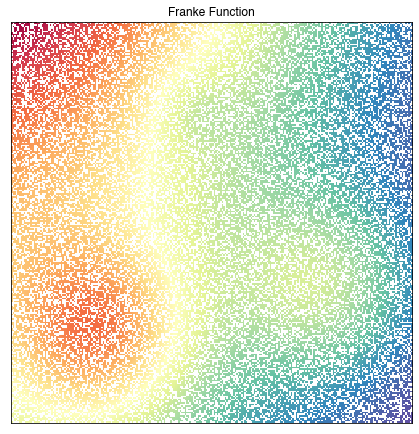

In [4]:
#-- plot data and interpolated data
f1, ax1 = plt.subplots(num=1, figsize=(6,6))
extents=(0,1,1,0)

#-- create color map with invalid points
cmap = plt.cm.get_cmap('Spectral_r').copy()
cmap.set_bad('w',0.)
#-- plot read data with missing values
ax1.imshow(ZI, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
#-- no ticks on the x and y axes
ax1.get_xaxis().set_ticks([]); ax1.get_yaxis().set_ticks([])
#-- set x and y limits
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
#-- add titles
ax1.set_title('Franke Function')
#-- subplot adjustments
f1.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.95,
	wspace=0.02,hspace=0.1)
plt.show()

### Interpolate missing values using inpainting algorithms

In [5]:
nearest = spi.inpaint(xpts, ypts, ZI, n=0)
inpainted = spi.inpaint(xpts, ypts, ZI, n=100)

### Plot Interpolated Grids

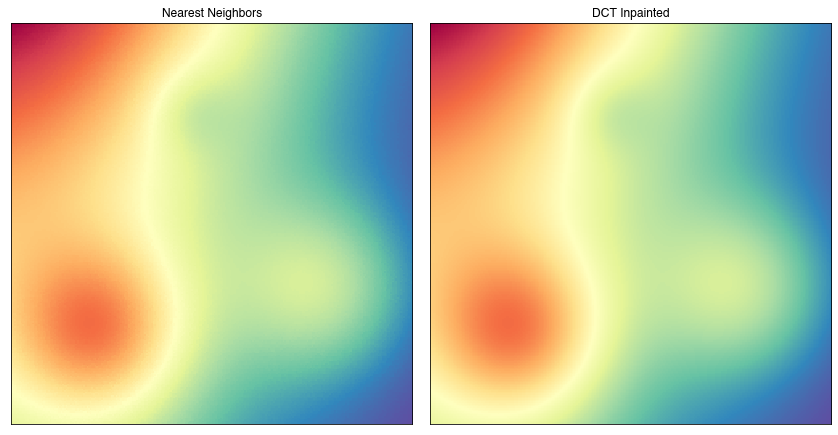

In [6]:
#-- plot data and interpolated data
f2,(ax1,ax2) = plt.subplots(num=2, ncols=2, sharex=True, sharey=True, figsize=(12,6))
extents=(0,1,1,0)

#-- create color map with invalid points
dmap = plt.cm.get_cmap('viridis').copy()
dmap.set_bad('w',0.)
#-- plot interpolated data with filled values
ax1.imshow(nearest, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
ax2.imshow(inpainted, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
#-- no ticks on the x and y axes
ax1.get_xaxis().set_ticks([]); ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([]); ax2.get_yaxis().set_ticks([])
#-- set x and y limits
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
#-- add titles
ax1.set_title('Nearest Neighbors')
ax2.set_title('DCT Inpainted')
#-- subplot adjustments
f2.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.95,
	wspace=0.02,hspace=0.1)
plt.show()